# Over fitting

## Getting started

In [111]:
# Load libraries
import numpy as np
import matplotlib.pylab as py

In [112]:
def generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.02, degree=1):
  x = np.random.uniform(-1, 1, size=number_of_points)

  true_a = 1.0
  true_b = 0.5

  mu = 0.0
  sigma = sigma
  noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

  y = true_a*x**degree + true_b + noise

  return x,y

def create_model(x, y, degree=1):
  # Lots of math magic in here!
  z = np.polyfit(x, y, deg=degree)
  y_hat_function = np.poly1d(z)
  return y_hat_function

def evaluate_model(model, x_train, y_train, x_test, y_test):
  py.scatter(x_train, y_train, color='green')
  py.scatter(x_train, model(x_train), color='cyan')

  py.scatter(x_test, y_test, color='red')
  py.scatter(x_test, model(x_test), color='blue')

  x_on_grid = np.arange(min([min(x_train), min(x_test)]), max([max(x_train), max(x_test)]), 0.01)
  y_predictions_on_grid = model(x_on_grid)

  py.plot(x_on_grid, y_predictions_on_grid)

  py.xlabel('Height')
  py.ylabel('Weight')

  print('training error: ', np.linalg.norm(y_train-model(x_train)))
  print('testing error: ', np.linalg.norm(y_test-model(x_test)))

In [121]:
number_of_points = 15
test_size = 5
seed=1234

training error:  0.07068793023475714
testing error:  0.03418940540242257


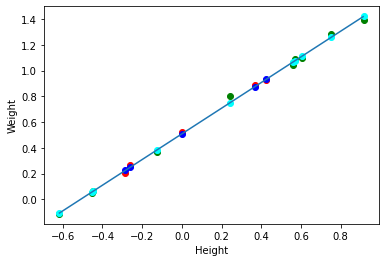

In [122]:
np.random.seed(seed)
x, y = generate_data(number_of_points = number_of_points, degree=1)

x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=1)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

training error:  0.5612006758112081
testing error:  0.44672239977768585


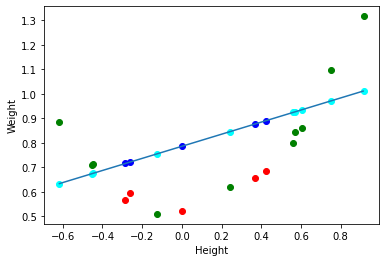

In [123]:
np.random.seed(seed)
x, y = generate_data(number_of_points = number_of_points, degree=2)

x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=1)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

training error:  0.06407733526680535
testing error:  0.033771618211030315


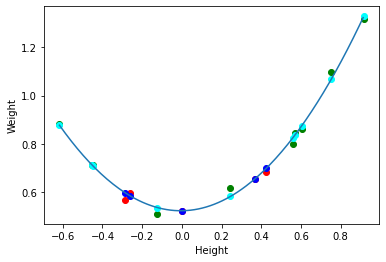

In [124]:
np.random.seed(seed)
x, y = generate_data(number_of_points = number_of_points, degree=2)

x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=2)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

training error:  0.06254726446953096
testing error:  0.03314005715457585


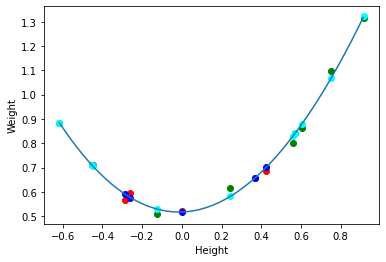

In [125]:
np.random.seed(seed)
x, y = generate_data(number_of_points = number_of_points, degree=2)

x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=3)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


training error:  6.070497165863025e-13
testing error:  3.8042967452434793


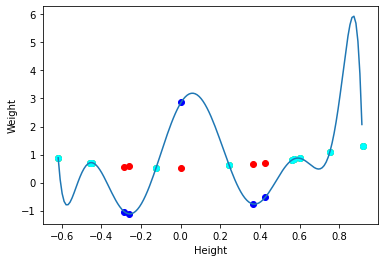

In [127]:
np.random.seed(seed)
x, y = generate_data(number_of_points = number_of_points, degree=2)

x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=11)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)